# loading the libraries we need: numpy, scipy, matplotlib

In [1]:
%matplotlib inline

import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

from skimage import data, io, filters
import imageio

photo_data = imageio.imread('junior.JPG')

type(photo_data)


imageio.core.util.Array

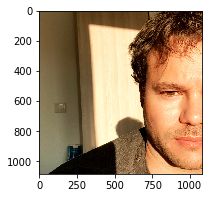

In [22]:
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

In [23]:
photo_data.shape

print(photo_data)

[[[  6   0   0]
  [108  93  72]
  [112  89  57]
  ...
  [ 64  30   5]
  [ 64  28   4]
  [ 65  29   7]]

 [[  7   0   0]
  [109  94  71]
  [113  90  58]
  ...
  [ 62  27   5]
  [ 62  26   4]
  [ 62  26   4]]

 [[  8   0   0]
  [111  95  70]
  [115  92  60]
  ...
  [ 58  23   1]
  [ 56  21   1]
  [ 59  22   3]]

 ...

 [[  0   2   0]
  [122 123 109]
  [125 124 104]
  ...
  [251 185 125]
  [252 184 123]
  [248 178 116]]

 [[  1   1   0]
  [121 122 108]
  [124 123 103]
  ...
  [251 185 124]
  [252 184 121]
  [248 178 116]]

 [[  1   1   0]
  [121 122 108]
  [121 120 100]
  ...
  [250 184 123]
  [251 181 119]
  [249 178 116]]]


In [24]:
photo_data.size


3525168

In [25]:
photo_data.min(),photo_data.max()
#maximo e minimo valor

(0, 255)

In [26]:
# media do data pixel
photo_data.mean()

122.17775805294953

In [28]:
photo_data[150,250,1]
# 1 corresponde a 166 que é a posição 1 no array photo_data


31

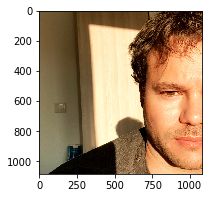

In [29]:
photo_data[150,250]=0
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

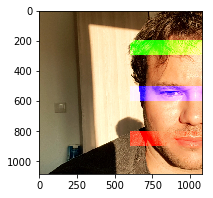

In [49]:
photo_data = imageio.imread('junior.JPG')

photo_data[200:300, 600: ,1]=250

photo_data[500:600, 600: ,2]=250

photo_data[800:900, 600: ,0]=250

plt.figure(figsize=(3,3))
plt.imshow(photo_data)

#podemos ver um aumento significante do valor do verde
#na posição 200:300
# se alteramos para 2 passa a ser azul
# zero passa para vermelho
# se eu altera 255 para 0 isso retiraria a cor em questão, ressaltando as demais

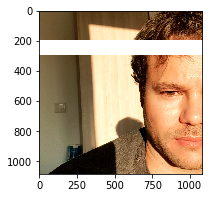

In [31]:
photo_data = imageio.imread('junior.JPG')

photo_data[200:300, : ]=255 #todas as cores são intensificadas
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

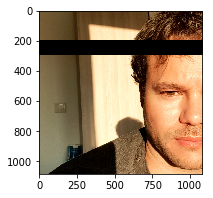

In [32]:
photo_data = imageio.imread('junior.JPG')

photo_data[200:300, : ]=0 #todas as cores são reduzidas a zero
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

# pick all pixels with low values


In [33]:
photo_data = imageio.imread('junior.JPG')

print("shape of photo_data: ", photo_data.shape)
low_value_filter = photo_data < 50
print("shape of low_value_filter: ", low_value_filter.shape)

shape of photo_data:  (1084, 1084, 3)
shape of low_value_filter:  (1084, 1084, 3)


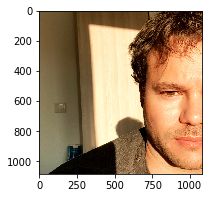

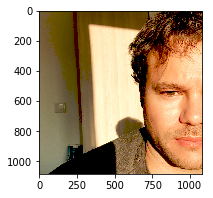

In [34]:
#import random

plt.figure(figsize=(3,3))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

In [35]:
photo_data = imageio.imread('junior.JPG')

print("shape of photo_data: ", photo_data.shape)
low_value_filter = photo_data < 200
print("shape of low_value_filter: ", low_value_filter.shape)

shape of photo_data:  (1084, 1084, 3)
shape of low_value_filter:  (1084, 1084, 3)


# filtering out low values

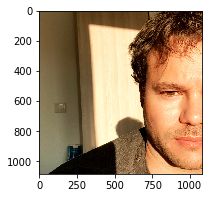

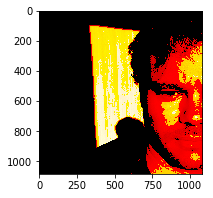

In [36]:
#import random

plt.figure(figsize=(3,3))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

# more row and column operations

you can design complex patters by making cols a function os rows or vice-versa
here we try a linear realtionship between rows and columns

In [37]:
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [38]:
photo_data[rows_range, cols_range]=255 # cria uma linha diagonal

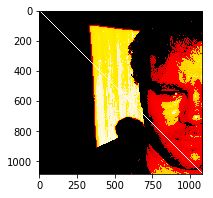

In [39]:
plt.figure(figsize=(3,3))
plt.imshow(photo_data)


Masking images
now let us something even cooler ... a mask is in shape of a circular disc

In [68]:
total_rows, total_cols, total_layers = photo_data.shape # é possivel inserir um arrey em tres variaveis

print("photo_data = ", photo_data.shape)

print(total_rows)
print(total_cols)
print(total_layers)

x, y = np.ogrid[:total_rows, :total_cols]

print("x = ", x.shape, "and y =", y.shape)

photo_data =  (604, 814, 3)
604
814
3
x =  (604, 1) and y = (1, 814)


In [41]:
center_row, center_col = total_rows / 2, total_cols /2
print("center_row = ", center_row, " AND center_col = ", center_col)
print(x - center_row)
print(y - center_col)

dist_from_center = (x - center_row)**2 + (y - center_col)**2
print(dist_from_center)
radius = (total_rows / 2)**2
print("Radius = ",  radius)
circular_mask = (dist_from_center > radius)
print(circular_mask)
print(circular_mask[1500:1700, 2000:2000])



center_row =  542.0  AND center_col =  542.0
[[-542.]
 [-541.]
 [-540.]
 ...
 [ 539.]
 [ 540.]
 [ 541.]]
[[-542. -541. -540. ...  539.  540.  541.]]
[[587528. 586445. 585364. ... 584285. 585364. 586445.]
 [586445. 585362. 584281. ... 583202. 584281. 585362.]
 [585364. 584281. 583200. ... 582121. 583200. 584281.]
 ...
 [584285. 583202. 582121. ... 581042. 582121. 583202.]
 [585364. 584281. 583200. ... 582121. 583200. 584281.]
 [586445. 585362. 584281. ... 583202. 584281. 585362.]]
Radius =  293764.0
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[]


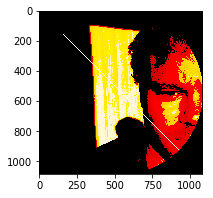

In [42]:
#photo_data = imageio.imread('junior.JPG')

photo_data[circular_mask]=0

plt.figure(figsize=[3,3])
plt.imshow(photo_data)

# futher masking

you can futher improve the maks, for example just get upper half a disk


In [43]:
x, y =np.ogrid[:total_rows, :total_cols]
half_upper = x < center_row # this line generates a mask for all rows above

half_upper_mask = np.logical_and(half_upper, circular_mask)


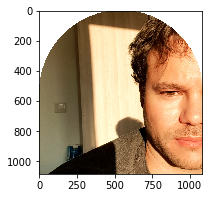

In [44]:
photo_data = imageio.imread('junior.JPG')

photo_data[half_upper_mask]=255
#photo_data[half_upper_mask]= random.randint(200,255)
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

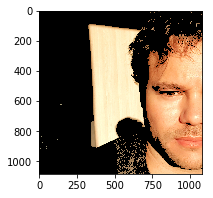

In [45]:
photo_data = imageio.imread('junior.JPG')

red_mask = photo_data[:, : ,0] < 150

photo_data[red_mask]=0
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

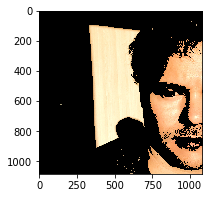

In [46]:
photo_data = imageio.imread('junior.JPG')

green_mask = photo_data[:, : ,1] < 150

photo_data[green_mask]=0
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

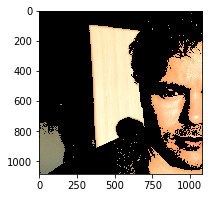

In [47]:
photo_data = imageio.imread('junior.JPG')

blue_mask = photo_data[:, : ,2] < 100

photo_data[blue_mask]=0
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

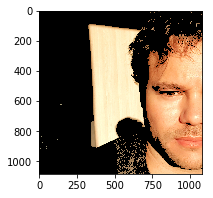

In [50]:
photo_data = imageio.imread('junior.JPG')

red_mask = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] < 150
blue_mask = photo_data[:, : ,2] < 150

final_mask = np.logical_and(red_mask, green_mask)

photo_data[red_mask]=0
plt.figure(figsize=(3,3))
plt.imshow(photo_data)

https://imageio.readthedocs.io/en/stable/examples.html

# creating a numpy array from an image file:
lets choose a WIFIRE satellite image file as an ndarray and display its type

C:\Users\gival\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\gival\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


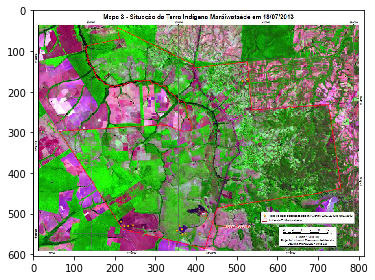

<class 'imageio.core.util.Image'>


In [51]:
from skimage import data, io, filters
import imageio

photo_data = imageio.imread('3layers.JPG')
io.imshow(photo_data)
io.show()
print(type(photo_data))

In [52]:
from skimage import data, io, filters
import imageio

photo_data = imageio.imread('3layers.JPG')

type(photo_data)

imageio.core.util.Image

C:\Users\gival\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\gival\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


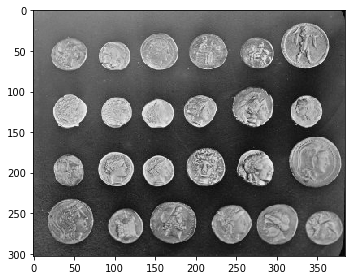

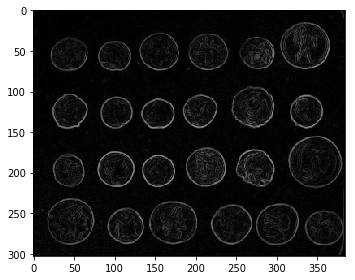

In [53]:
from skimage import data, io, filters

image = data.coins()
io.imshow(image)
io.show()
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

C:\Users\gival\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\gival\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


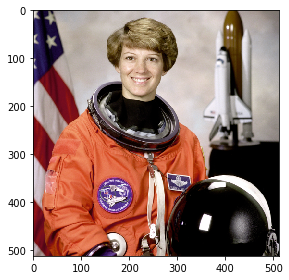

imageio.core.util.Image

In [54]:
import imageio
from skimage import data, io, filters


im = imageio.imread('imageio:astronaut.png')
im.shape  # im is a numpy array
(512, 512, 3)
imageio.imwrite('astronaut-gray.jpg', im[:, :, 0])

io.imshow(im)
io.show()
type(im)


In [55]:
def __init__(self):
     
    if False:
        import imageio
        im = imageio.imread('astronaut.png')[:,:,1].copy()
        self._tex_size = im.shape[1], im.shape[0]
        self._data = im.tostring()
    else:
        self._data = open(os.path.join(THISDIR, 'glyphs.blob'), 'rb').read()
        self._tex_size = TEX_WIDTH, len(self._data) // TEX_WIDTH
     
    self._use_new_gl = True
    self._bgcolor = 0.8, 0.8, 0.8
    self._color = 0, 0, 0
    self.init_gl()

In [56]:
def test_progress():
     
    dname1, dname2, fname1, fname2 = _prepare()
     
    imageio.imread(fname1, progress=True)
    imageio.imread(fname1, progress=core.StdoutProgressIndicator('test'))
    imageio.imread(fname1, progress=None)
    raises(ValueError, imageio.imread, fname1, progress=3)

In [57]:
import imageio

im = imageio.imread('3layers.JPG')
print(im.shape)

(604, 814, 3)


In [62]:
x = lambda a : a + 10

print(x(5))

15


In [66]:
a = input()
type(a)

3


str

True